# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# read csv
df = pd.read_csv('output_data/cities.csv')

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | flin flon
Processing Record 4 of Set 1 | casper
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | al jaradiyah
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tamanrasset
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | penzance
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | opuwo
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | benghazi
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | rossleben
Processing Record 20 of Set 1 | ippy
Processing Record 21 of Set 1 | bairnsdale
Processing Record 22 of Set 1 | fort wellington
Processing 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,24.57,77,3,4.90,MU,1699315496
1,blackmans bay,-43.0167,147.3167,15.07,80,95,1.86,AU,1699315758
2,flin flon,54.7682,-101.8650,-4.14,73,100,3.17,CA,1699315758
3,casper,42.8666,-106.3131,12.62,42,40,4.63,US,1699315711
4,grytviken,-54.2811,-36.5092,2.23,90,75,1.63,GS,1699315753


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,24.57,77,3,4.90,MU,1699315496
1,blackmans bay,-43.0167,147.3167,15.07,80,95,1.86,AU,1699315758
2,flin flon,54.7682,-101.8650,-4.14,73,100,3.17,CA,1699315758
3,casper,42.8666,-106.3131,12.62,42,40,4.63,US,1699315711
4,grytviken,-54.2811,-36.5092,2.23,90,75,1.63,GS,1699315753


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

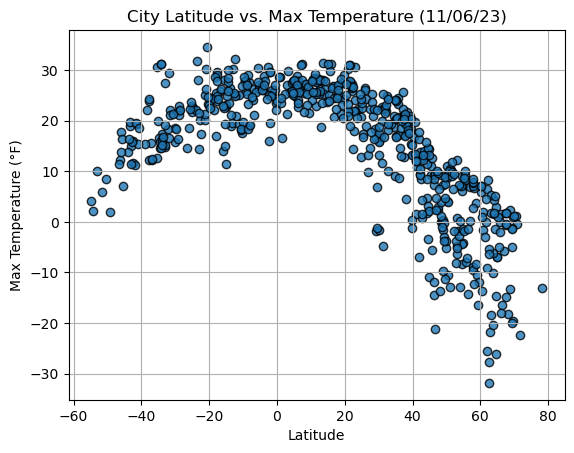

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

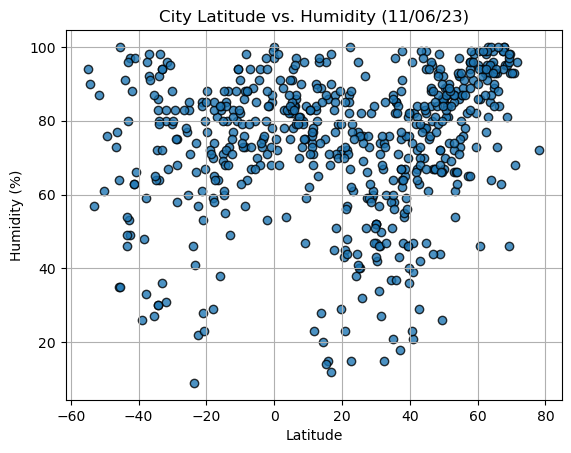

In [16]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

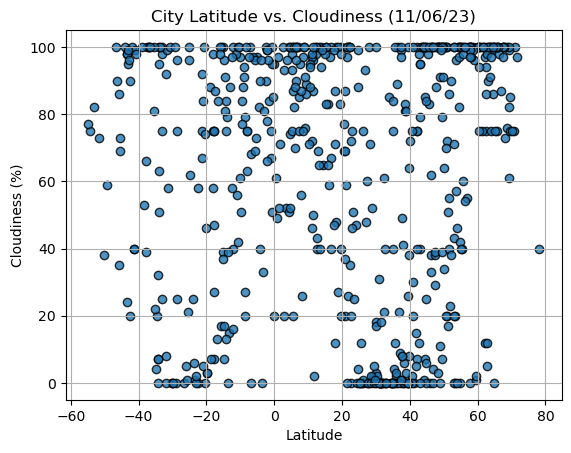

In [17]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


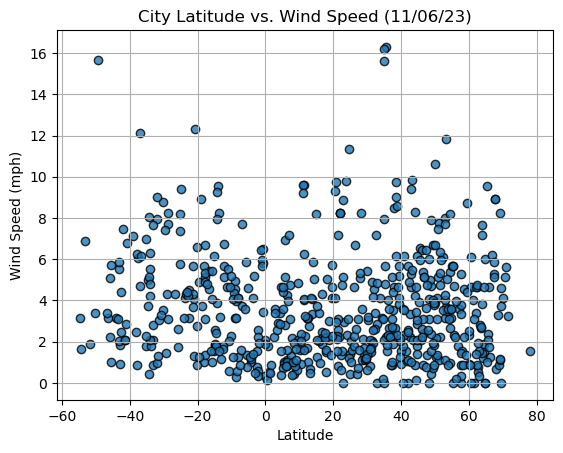

In [18]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Calculate linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

    # Plot scatter plot
    plt.scatter(x_values, y_values)
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value**2}")
    plt.show()

# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,flin flon,54.7682,-101.8650,-4.14,73,100,3.17,CA,1699315758
3,casper,42.8666,-106.3131,12.62,42,40,4.63,US,1699315711
5,al jaradiyah,16.5795,42.9124,26.72,68,97,2.47,SA,1699315758
8,tamanrasset,22.7850,5.5228,17.95,15,0,0.00,DZ,1699315759
9,stanley,54.8680,-1.6985,7.06,92,0,3.60,GB,1699315759


In [20]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,24.57,77,3,4.90,MU,1699315496
1,blackmans bay,-43.0167,147.3167,15.07,80,95,1.86,AU,1699315758
4,grytviken,-54.2811,-36.5092,2.23,90,75,1.63,GS,1699315753
6,lebu,-37.6167,-73.6500,12.27,96,100,6.07,CL,1699315488
7,port-aux-francais,-49.3500,70.2167,1.99,76,59,15.66,TF,1699315759


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.84


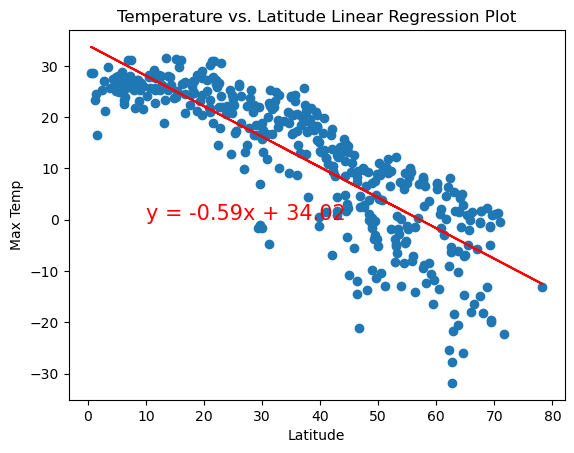

In [21]:
from scipy.stats import linregress

# Define the data for x and y axis
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Use linregress to perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create a string for the equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot')

print(f"The r-value is: {r_value:.2f}")
plt.show()


The r-value is: 0.66


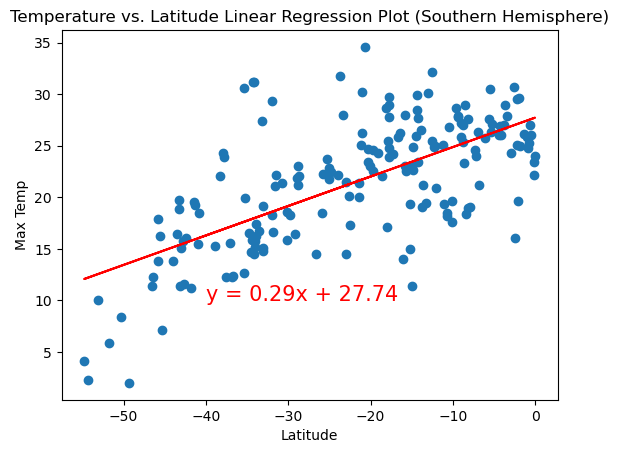

In [28]:

# Define the data for x and y axis
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Use linregress to perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create a string for the equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot (Southern Hemisphere)')

print(f"The r-value is: {r_value:.2f}")
plt.show()


**Discussion about the linear relationship:** 
A significant change in temperature occurs as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.26220870684620734


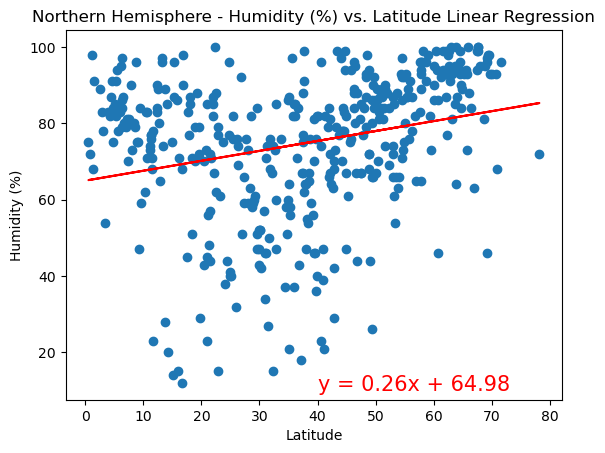

In [27]:
# Function to create linear regression and scatter plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    
    return plt

# Call the function with the appropriate parameters
plt = plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 
    'Humidity (%)', 
    (40, 10)) # Adjust text coordinates as needed

plt.show()

**Discussion about the linear relationship:**
"This graph suggests a modestly positive correlation between latitude and humidity in the Northern Hemisphere, with the regression line indicating that humidity tends to increase as one moves northwards from the equator. The slope of the regression line indicates that for every degree of latitude increase, humidity increases by an average of 0.26%, starting at a base level of around at the equator.

The r-value is: 0.03667787462593636


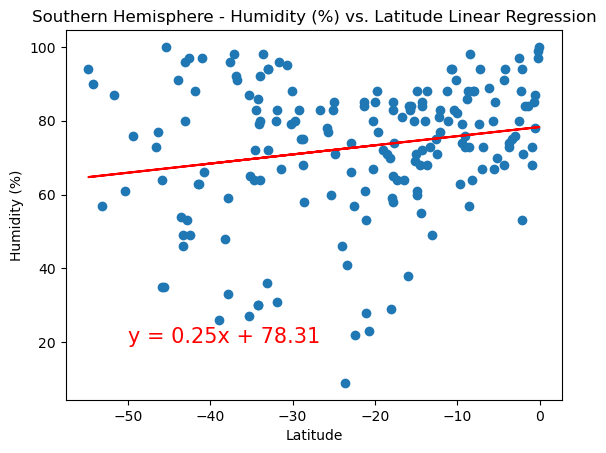

In [32]:

southern_hemi_df['Lat'] < 0

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create equation of the line to calculate predicted humidity
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Print r square value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005965502205386132


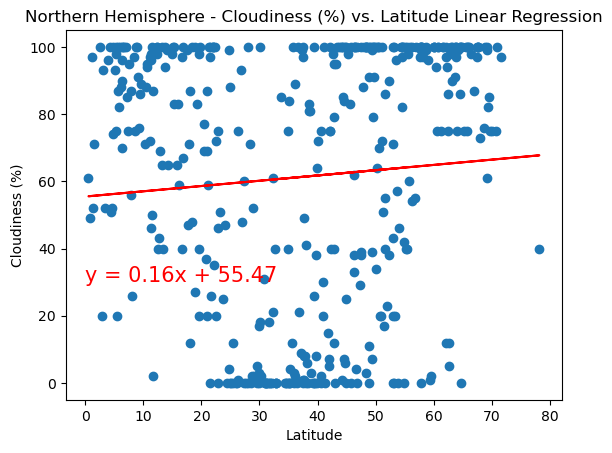

In [34]:


northern_hemi_df['Lat'] >= 0

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create equation of the line to calculate predicted cloudiness
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (0,30), fontsize=15, color="red") # Adjust the coordinates for the annotation as needed

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Print r square value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** 
"The regression line indicates a slight positive correlation between latitude and cloudiness in the Northern Hemisphere. As latitude increases, there is a weak tendency for cloudiness to increase as well. However, given the low slope of the line and the wide scatter of the data points, this relationship is not strong and indicates that latitude alone is not a reliable predictor of cloudiness."

The r-value is: 0.002149681051027133


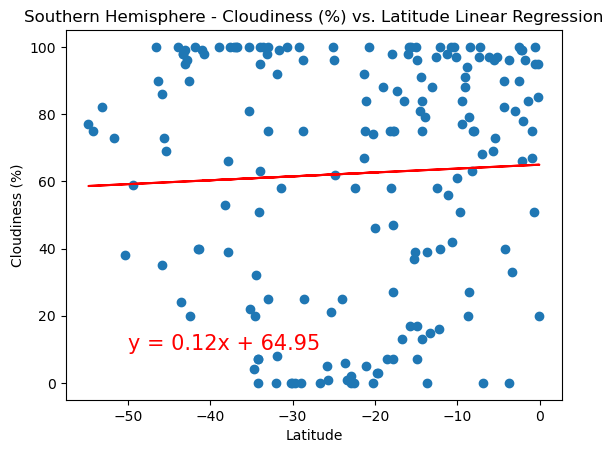

In [38]:


southern_hemi_df['Lat'] < 0

# Function to create linear regression and scatter plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {r_value**2}")  # Squaring the r-value for determination coefficient
    
    return plt

# Call the function with the appropriate parameters
plt = plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 
    'Cloudiness (%)', 
    (-50, 10))  # Adjust text coordinates as needed

plt.show()


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006306107139218184


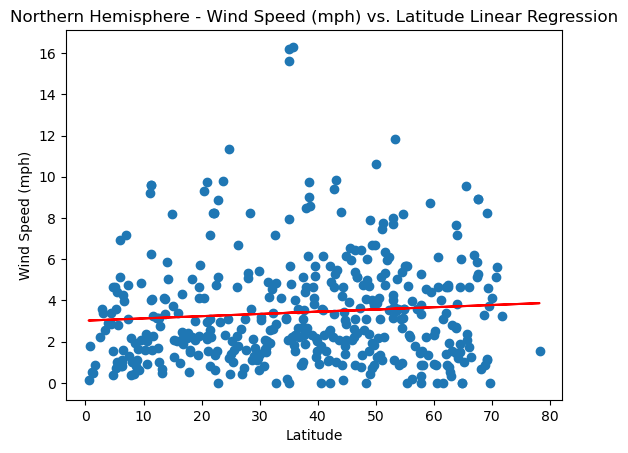

In [40]:

northern_hemi_df['Lat'] >= 0

# Function to create linear regression and scatter plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {r_value**2}")  # Squaring the r-value for determination coefficient
    
    return plt

# Call the function with the appropriate parameters
plt = plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 
    'Wind Speed (mph)', 
    (40, 20))  # Adjust text coordinates as needed

plt.show()


**Discussion about the linear relationship:** 
"The regression line plotted across the data points indicates a very weak or no apparent correlation between wind speed and latitude in the Northern Hemisphere. The flatness of the regression line suggests that changes in latitude have no substantial impact on wind speed according to this dataset. This is also supported by the significant dispersion of the data points, showing that wind speed varies widely at similar latitudes, and this variability is not captured by a simple linear relationship."

The r-value is: 0.03155125222861453


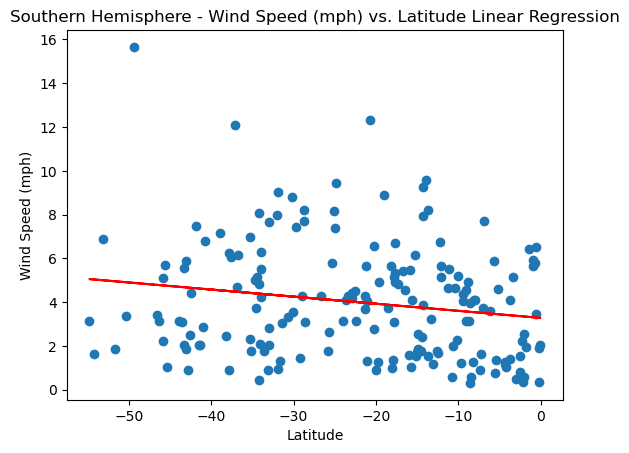

In [42]:

southern_hemi_df['Lat'] < 0

# Now use the previously defined function plot_linear_regression to create the plot for the Southern Hemisphere
plt = plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 
    'Wind Speed (mph)', 
    (-50, 20))  # Adjust text coordinates as needed

plt.show()
